In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Load two images
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

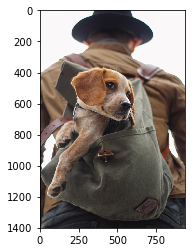

In [10]:
plt.imshow(img1)

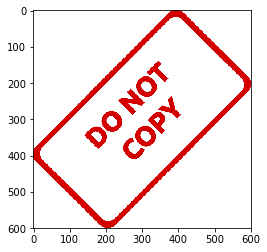

In [11]:
plt.imshow(img2)

In [12]:
img1.shape

(1401, 934, 3)

In [15]:
x_offset = img1.shape[1] - img2.shape[1]

In [16]:
y_offset = img1.shape[0] - img2.shape[0]

In [19]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows, cols, channels = img2.shape

# roi = img1[0:rows, 0:cols] # Top left corner
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]] # Bottom right corner

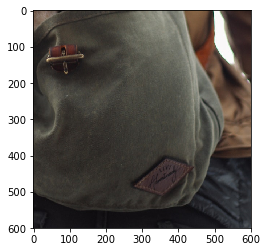

In [20]:
plt.imshow(roi)

In [21]:
roi.shape

(600, 600, 3)

In [22]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

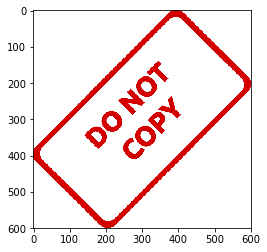

In [23]:
plt.imshow(img2)

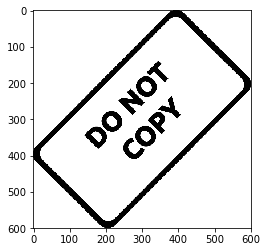

In [25]:
plt.imshow(img2gray,cmap='gray')

In [26]:
img2gray.shape

(600, 600)

In [27]:
mask_inv = cv2.bitwise_not(img2gray)

In [28]:
mask_inv.shape

(600, 600)

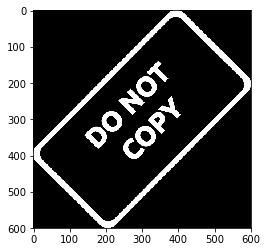

In [30]:
plt.imshow(mask_inv,cmap='gray')

In [31]:
white_background = np.full(img2.shape,255,dtype=np.uint)

In [32]:
bg = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [33]:
bg.shape

(600, 600, 3)

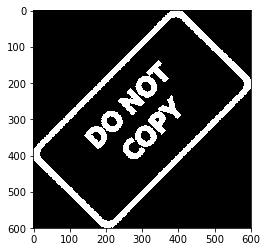

In [35]:
plt.imshow(bg)

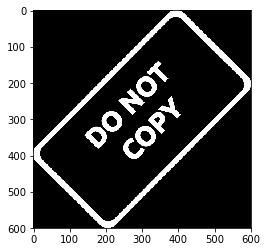

In [36]:
plt.imshow(mask_inv,cmap='gray')

In [43]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

In [39]:
fg.shape

(600, 600, 3)

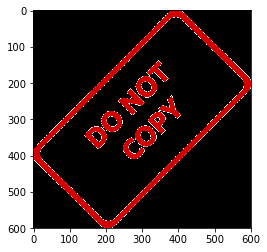

In [40]:
plt.imshow(fg)

In [44]:
final_roi = cv2.bitwise_or(roi,fg)

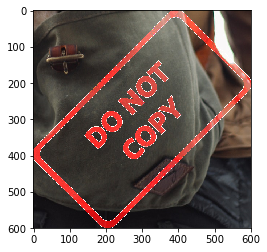

In [45]:
plt.imshow(final_roi)

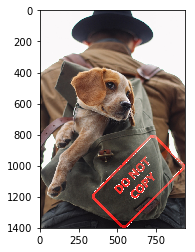

In [49]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)